# Import necessary libraries

In [1]:
import numpy as np
import csv
import random
import matplotlib.pyplot as plt


# Load data from CSV file

In [2]:
data = np.genfromtxt(r"C:\Users\MUTHU SELVI\Downloads\ex1data2.txt", delimiter=',')

# Extract X and Y from the loaded data
X = data[:, :2].T  # Assuming the first two columns are X
Y = data[:, 2]  # Assuming the third column is Y

# Data visualization

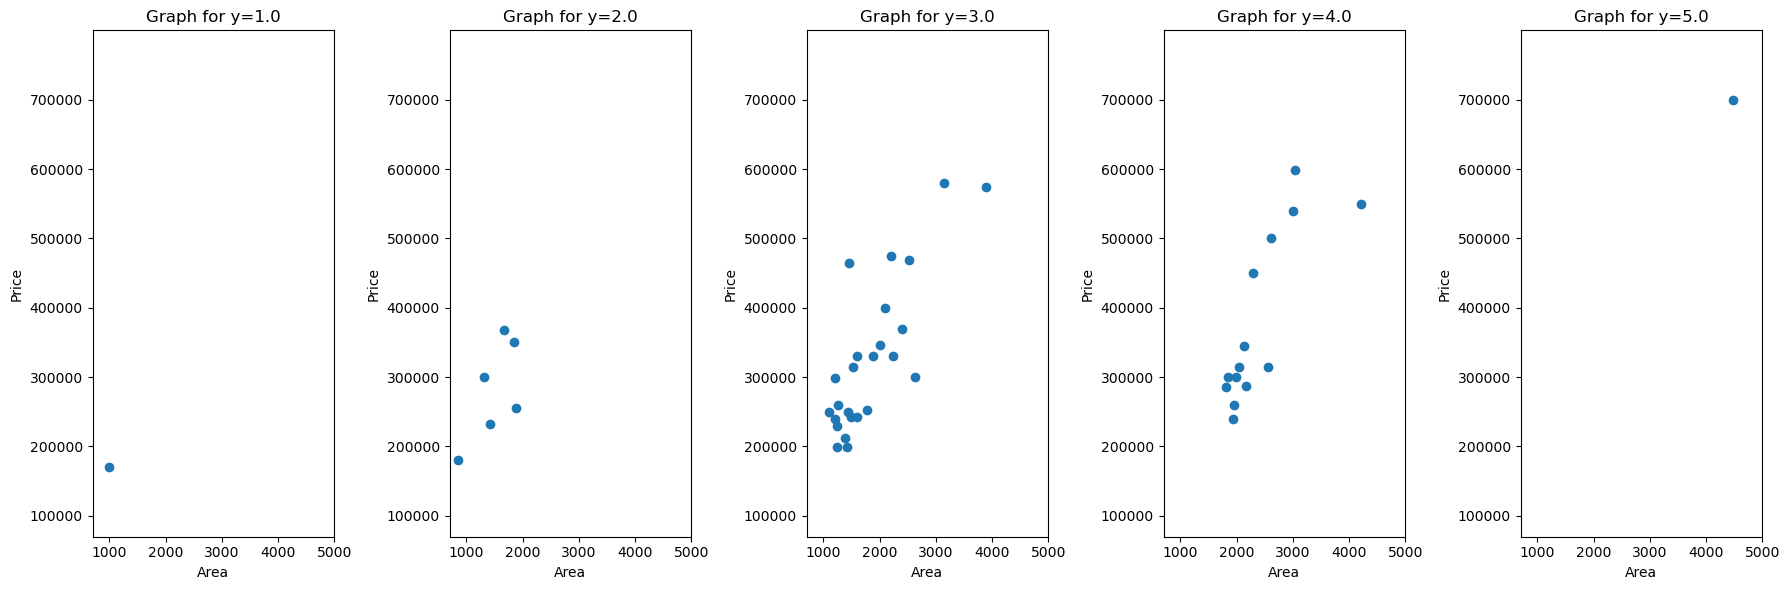

In [3]:
## Plotting Area VS Price by keeping Number of Bedrooms as constant
unique_y_values = np.unique(data[:, 1])

fig, axs = plt.subplots(1, len(unique_y_values), figsize=(18, 6))

for i, y_val in enumerate(unique_y_values):
    subset_data = data[data[:, 1] == y_val]
    x_values = subset_data[:, 0]
    z_values = subset_data[:, 2]
    ax = axs[i]
    ax.scatter(x_values, z_values)
    ax.set_title(f'Graph for y={y_val}')
    ax.set_xlabel('Area')
    ax.set_ylabel('Price')
    ax.set_xlim([700, 5000])
    ax.set_ylim([min(Y)-1e5, max(Y)+1e5])

plt.tight_layout()
plt.show()


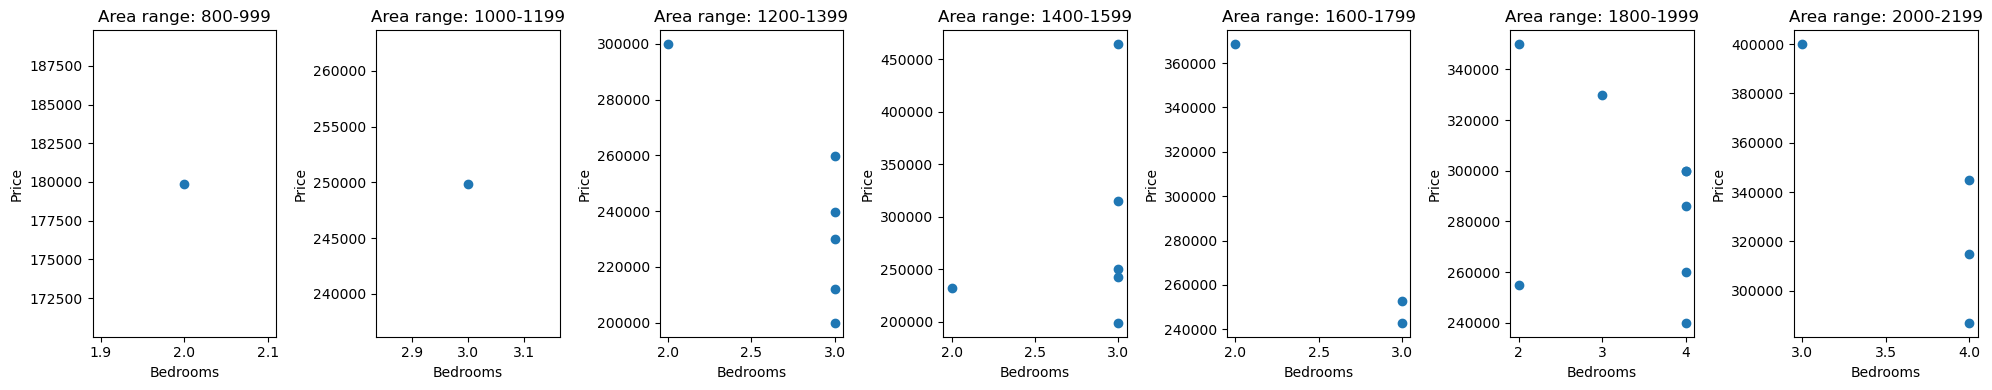

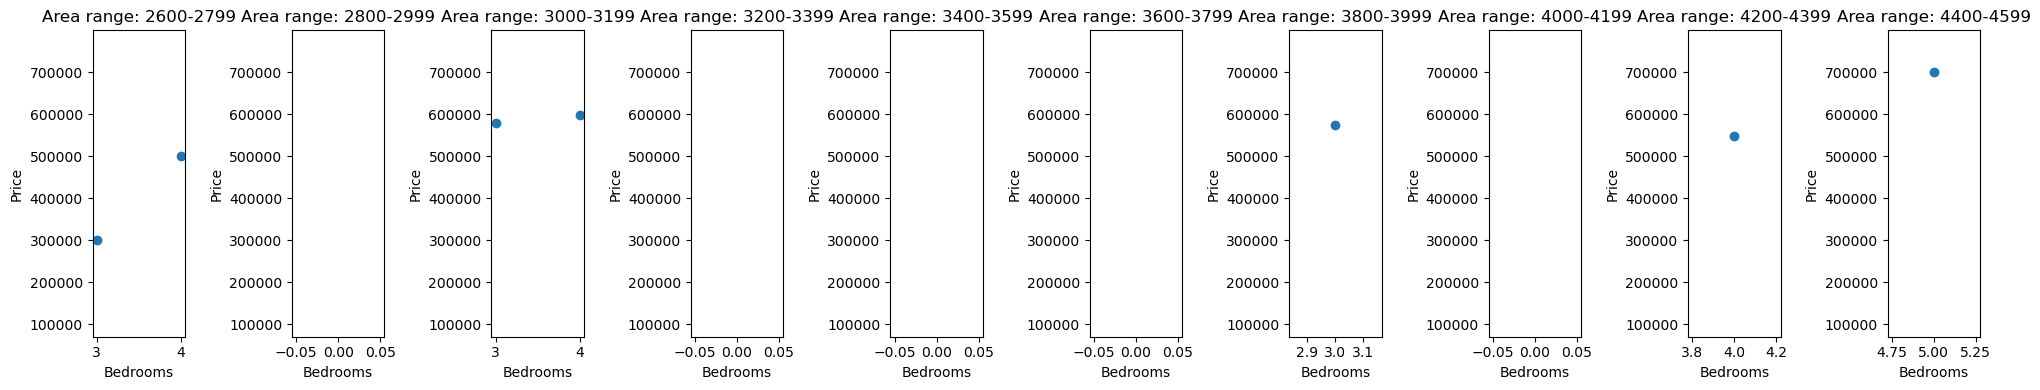

In [4]:
## Plotting No. of Bedrooms VS Price by bucketing Area (with interval of 200)
x_ranges = [(800 + i*200, 999 + i*200) for i in range(7)]

fig, axs = plt.subplots(1, len(x_ranges), figsize=(20, 4))

for i, x_range in enumerate(x_ranges):
    subset_data = data[(data[:, 0] > x_range[0]) & (data[:, 0] <= x_range[1])]
    y_values = subset_data[:, 1]
    z_values = subset_data[:, 2]
    ax = axs[i]
    ax.scatter(y_values, z_values)
    ax.set_title(f'Area range: {x_range[0]}-{x_range[1]}')
    ax.set_xlabel('Bedrooms')
    ax.set_ylabel('Price')

plt.tight_layout()
plt.show()

x_ranges = [(800 + i*200, 999 + i*200) for i in range(9, 19)]

fig, axs = plt.subplots(1, len(x_ranges), figsize=(20, 4))

for i, x_range in enumerate(x_ranges):
    subset_data = data[(data[:, 0] > x_range[0]) & (data[:, 0] <= x_range[1])]
    y_values = subset_data[:, 1]
    z_values = subset_data[:, 2]
    ax = axs[i]
    ax.scatter(y_values, z_values)
    ax.set_title(f'Area range: {x_range[0]}-{x_range[1]}')
    ax.set_xlabel('Bedrooms')
    ax.set_ylabel('Price')
    ax.set_ylim([min(Y)-1e5, max(Y)+1e5])

plt.tight_layout()
plt.show()


# feature normalization

In [5]:
# Normalizing the Features X[0] & X[1]
def normalize_list(lst):
    if len(lst) == 0:
        return lst

    mean = sum(lst) / len(lst)
    variance = sum((x - mean) ** 2 for x in lst) / len(lst)
    std_dev = variance ** 0.5

    normalized_lst = [(x - mean) / std_dev for x in lst]

    return np.array(normalized_lst)

norm_X0 = normalize_list(X[0])
norm_X1 = normalize_list(X[1])
print(norm_X0[:6], norm_X1[:6], sep='\n')

def percentage_difference(value1, value2):
    return (np.abs(value1 - value2) / ((value1 + value2) / 2)) * 100

def plot_loss_vs_epoch(loss_history, algorithm_name):
    plt.plot(range(len(loss_history)), loss_history, label=algorithm_name)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'{algorithm_name} - Epoch vs. Loss')
    plt.legend()
    plt.show()

[ 0.13141542 -0.5096407   0.5079087  -0.74367706  1.27107075 -0.01994505]
[-0.22609337 -0.22609337 -0.22609337 -1.5543919   1.10220517  1.10220517]


# Batch Gradient Descent Algorithm

Epoch 0, Loss: 131182094445.80516
Epoch 500, Loss: 21328533606.1263
Epoch 1000, Loss: 6725547201.059761
Epoch 1142, Loss: 5686797091.682776
Converged!
Final weights: w0=305881.34448472346, w1=13182.446067787101, w2=86795.47766820644


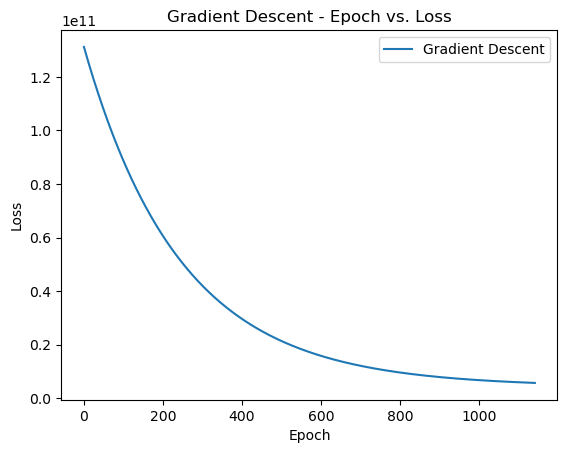

Epoch 0, Loss: 128759711891.70296
Epoch 359, Loss: 4370060551.647941
Converged!
Final weights for SGD with one sample: w0=328884.31541753426, w1=6235.021406875629, w2=96116.69181915773


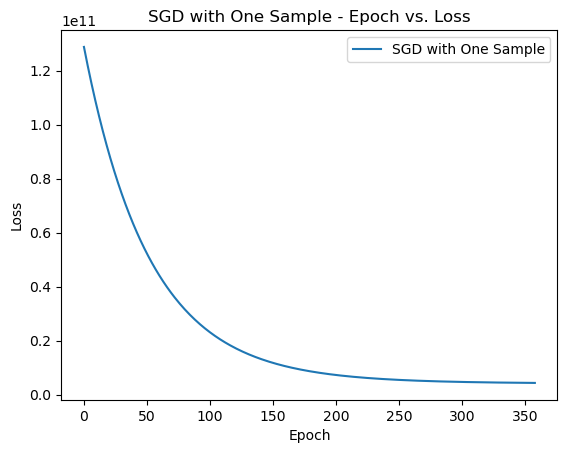

In [6]:
def batch_gradient_descent(X0, X1, Y, w0, w1, w2, learning_rate, epochs=7000, tol=0.1, consecutive_instances=10):
    n = len(X0)
    count = 0
    prev_loss = 0
    loss_history_gd = []

    for epoch in range(epochs):
        predictions = w0 + (w1 * X1) + (w2 * X0)
        overall_loss = np.mean((Y - predictions)**2)
        gradient_w0 = -2 * np.mean(Y - predictions)
        gradient_w1 = -2 * np.mean((Y - predictions) * X1)
        gradient_w2 = -2 * np.mean((Y - predictions) * X0)

        w0 -= learning_rate * gradient_w0
        w1 -= learning_rate * gradient_w1
        w2 -= learning_rate * gradient_w2

        percent_diff = percentage_difference(prev_loss, overall_loss)
        if percent_diff < tol:
            count += 1
        else:
            count = 0

        if epoch % 500 == 0:
            print(f"Epoch {epoch}, Loss: {overall_loss}")

        if count >= consecutive_instances:
            print(f"Epoch {epoch}, Loss: {overall_loss}")
            print("Converged!")
            break

        loss_history_gd.append(overall_loss)
        prev_loss = overall_loss

    return w0, w1, w2, loss_history_gd

w_0 = 1
w_1 = 1
w_2 = 1
learning_rate = 0.001
w0, w1, w2, loss_history_gd = batch_gradient_descent(norm_X0, norm_X1, Y, w_0, w_1, w_2, learning_rate)
print(f"Final weights: w0={w0}, w1={w1}, w2={w2}")
plot_loss_vs_epoch(loss_history_gd, 'Gradient Descent')

# Stochastic Gradient Descent
def sgd_one_sample(X0, X1, Y, w0, w1, w2, learning_rate, epochs=6000, tol=0.1, consecutive_instances=10):
    n = len(X0)
    prev_loss = 0
    count = 0
    loss_history_sgd_one_sample = []

    for epoch in range(epochs):
        index_list = list(range(n))
        random.shuffle(index_list)
        for random_index in index_list:
            x0_i = X0[random_index]
            x1_i = X1[random_index]
            y_i = Y[random_index]

            prediction = w0 + w1 * x1_i + w2 * x0_i
            loss = (y_i - prediction)**2

            gradient_w0 = -2 * (y_i - prediction)
            gradient_w1 = -2 * (y_i - prediction) * x1_i
            gradient_w2 = -2 * (y_i - prediction) * x0_i

            w0 -= learning_rate * gradient_w0
            w1 -= learning_rate * gradient_w1
            w2 -= learning_rate * gradient_w2

        predictions = w0 + w1 * X1 + w2 * X0
        overall_loss = np.mean((Y - predictions)**2)

        percent_diff = percentage_difference(prev_loss, overall_loss)
        if percent_diff < tol:
            count += 1
        else:
            count = 0

        if epoch % 500 == 0:
            print(f"Epoch {epoch}, Loss: {overall_loss}")

        if count >= consecutive_instances:
            print(f"Epoch {epoch}, Loss: {overall_loss}")
            print("Converged!")
            break

        loss_history_sgd_one_sample.append(overall_loss)
        prev_loss = overall_loss

    return w0, w1, w2, loss_history_sgd_one_sample

w_0 = 1
w_1 = 1
w_2 = 1
learning_rate = 0.0001
w0_sgd_one_sample, w1_sgd_one_sample, w2_sgd_one_sample, loss_history_sgd_one_sample = sgd_one_sample(norm_X0, norm_X1, Y, w_0, w_1, w_2, learning_rate)
print(f"Final weights for SGD with one sample: w0={w0_sgd_one_sample}, w1={w1_sgd_one_sample}, w2={w2_sgd_one_sample}")
plot_loss_vs_epoch(loss_history_sgd_one_sample, 'SGD with One Sample')


# Mini Batch Gradient Descent

Epoch 0, Loss: 130132305298.74146
Epoch 500, Loss: 6666776236.017898
Epoch 712, Loss: 4700112328.815984
Converged!
Final weights for Mini Batch Gradient Descent: w0=320998.8429710706, w1=9312.764738841395, w2=92592.42718785391


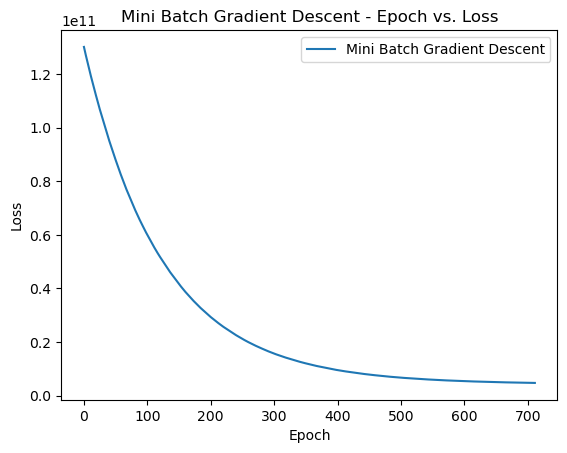

In [9]:
def mini_batch_gd(X0, X1, Y, w0, w1, w2, learning_rate, batch_size=10, epochs=7000, tol=0.1, consecutive_instances=10):
    n = len(X0)
    prev_loss = 0
    count = 0
    loss_history_mini_batch_gd = []

    for epoch in range(epochs):
        indices = np.arange(n)
        np.random.shuffle(indices)
        batch_indices = np.arange(0, n, batch_size)
        np.random.shuffle(batch_indices)

        for i in batch_indices:
            batch_indices = indices[i:i+batch_size]
            X0_batch = X0[batch_indices]
            X1_batch = X1[batch_indices]
            Y_batch = Y[batch_indices]

            predictions = w0 + w1 * X1_batch + w2 * X0_batch
            overall_loss = np.mean((Y_batch - predictions)**2)
            gradient_w0 = -2 * np.mean(Y_batch - predictions)
            gradient_w1 = -2 * np.mean((Y_batch - predictions) * X1_batch)
            gradient_w2 = -2 * np.mean((Y_batch - predictions) * X0_batch)

            w0 -= learning_rate * gradient_w0
            w1 -= learning_rate * gradient_w1
            w2 -= learning_rate * gradient_w2

        predictions = w0 + w1 * X1 + w2 * X0
        overall_loss = np.mean((Y - predictions)**2)

        percent_diff = percentage_difference(prev_loss, overall_loss)
        if percent_diff < tol:
            count += 1
        else:
            count = 0

        if epoch % 500 == 0:
            print(f"Epoch {epoch}, Loss: {overall_loss}")

        if count >= consecutive_instances:
            print(f"Epoch {epoch}, Loss: {overall_loss}")
            print("Converged!")
            break

        loss_history_mini_batch_gd.append(overall_loss)
        prev_loss = overall_loss

    return w0, w1, w2, loss_history_mini_batch_gd

w_0 = 1
w_1 = 1
w_2 = 1
learning_rate = 0.001
batch_size = 30
w0_mini_batch_gd, w1_mini_batch_gd, w2_mini_batch_gd, loss_history_mini_batch_gd = mini_batch_gd(norm_X0, norm_X1, Y, w_0, w_1, w_2, learning_rate, batch_size)
print(f"Final weights for Mini Batch Gradient Descent: w0={w0_mini_batch_gd}, w1={w1_mini_batch_gd}, w2={w2_mini_batch_gd}")
plot_loss_vs_epoch(loss_history_mini_batch_gd, 'Mini Batch Gradient Descent')

# Neural Network using TensorFlow

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[:, :2], data[:, 2], test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

C:\Users\MUTHU SELVI\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# compile and evaluate the model

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 112074809344.0000 - val_loss: 138010886144.0000
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - loss: 112074792960.0000 - val_loss: 138010869760.0000
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - loss: 112074776576.0000 - val_loss: 138010853376.0000
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - loss: 112074760192.0000 - val_loss: 138010836992.0000
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - loss: 112074735616.0000 - val_loss: 138010820608.0000
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 112074711040.0000 - val_loss: 138010787840.0000
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 112074702848.0000 - val_loss: 138010771456.0000
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 112074678272.0000 - val_loss: 138010738688.0000
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 112074661888.0000 - val_loss: 138010722304.0000
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76

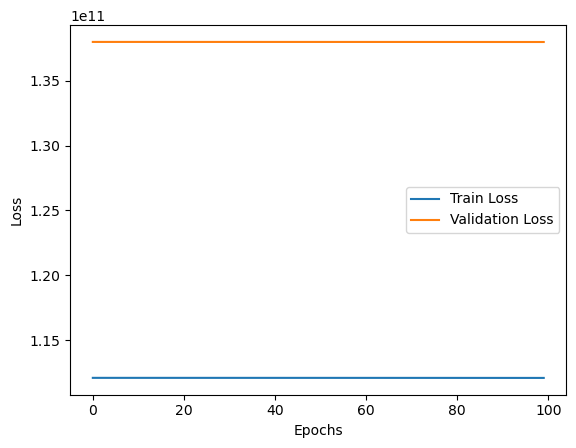

In [11]:
# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, verbose=1)

# Evaluate the model
loss = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {loss}')

# Plot loss over epochs
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
